## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import time

import matplotlib.pyplot as plt

In [2]:
def math_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [3]:
TSPA_PATH = "../data/TSPA.csv"
TSPB_PATH = "../data/TSPB.csv"

## Read Data

In [4]:
df = pd.read_csv(TSPA_PATH, sep=";", header=None)
df.columns = ["x", "y", "val"]
df

,x,y,val
0,1355,1796,496
1,2524,387,414
2,2769,430,500
3,3131,1199,1133
4,661,87,903
...,...,...,...
195,189,1151,1145
196,3688,759,727
197,973,984,1637
198,910,1383,1255


## Utils

In [5]:
def plot_nodes_with_lines(nodes, connections=None):
    """
    Plots nodes with optional lines connecting them.

    Parameters:
    nodes: DataFrame of nodes, each with 'x', 'y', and 'val'.
    connections: list of node positions in nodes DataFrame in order of connections
    """
    plt.figure(figsize=(14, 7))

    # Plotting the points
    plt.scatter(df.x, df.y, color='blue')

    # Adding labels above the points
    for i in range(len(nodes)):
        plt.text(df.x[i], df.y[i] + 20, str(df.val[i]), ha='center', fontsize=9, color='black')

    # Drawing lines between specified connections
    if connections:
        for start, end in zip(connections[:-1], connections[1:]):
            plt.plot([df.x[start], df.x[end]], [df.y[start], df.y[end]], color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    text = 'Nodes with Values' if not connections else 'Nodes with Values and Connections'
    plt.title(text)
    plt.grid(False)
    plt.show()

def get_distance_matrix(df, distance_function):
    """
    Calculates the distance matrix for a set of nodes using the given distance function.

    Parameters:
    nodes: DataFrame of nodes, each with 'x', 'y', and 'val'.
    distance_function: function that takes two points (x1, y1) and (x2, y2) and returns the distance.

    Returns:
    A 2D numpy array representing the distance matrix.
    """
    positions = df[["x", "y"]]
    num_nodes = len(positions)
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(num_nodes):
            distance_matrix[i, j] = distance_function(positions.iloc[i], positions.iloc[j])

    return distance_matrix

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
    # return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

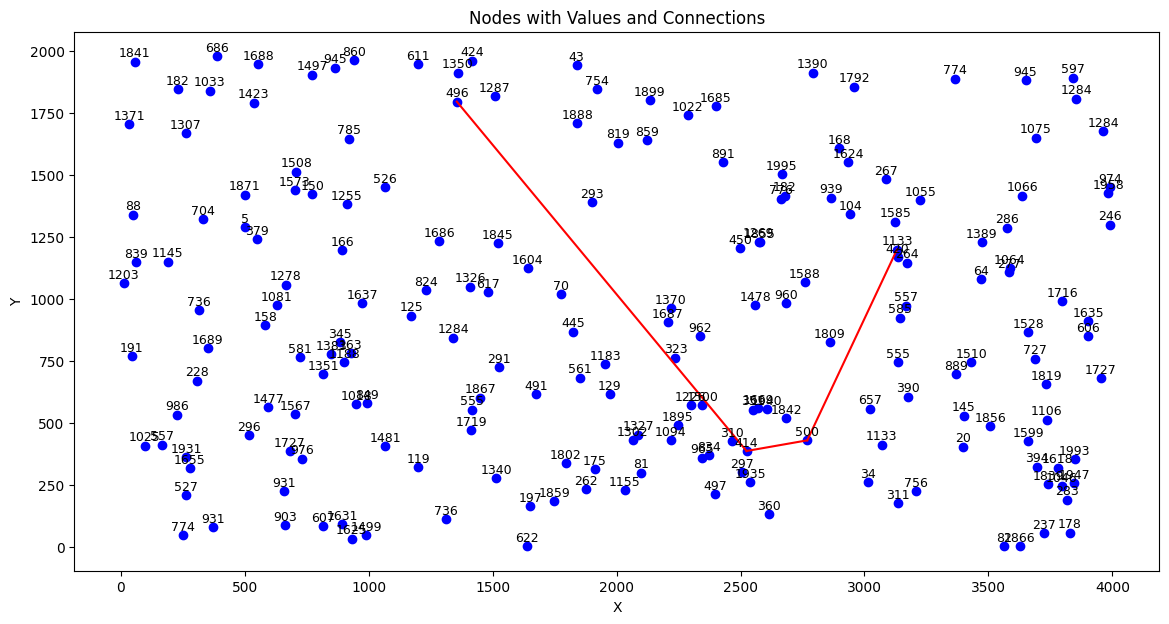

In [6]:
plot_nodes_with_lines(df, [0,1,2,3])

In [7]:
distance_matrix = get_distance_matrix(df, euclidean_distance)
distance_matrix

array([[   0.        , 1830.80364867, 1966.04984677, ...,  897.36726038,
         607.11942812, 1100.35357954],
       [1830.80364867,    0.        ,  248.74484919, ..., 1661.9296014 ,
        1896.57902551, 2600.03230749],
       [1966.04984677,  248.74484919,    0.        , ..., 1879.50312583,
        2089.04044958, 2796.45668659],
       ...,
       [ 897.36726038, 1661.9296014 , 1879.50312583, ...,    0.        ,
         403.9430653 ,  987.29225663],
       [ 607.11942812, 1896.57902551, 2089.04044958, ...,  403.9430653 ,
           0.        ,  708.30784268],
       [1100.35357954, 2600.03230749, 2796.45668659, ...,  987.29225663,
         708.30784268,    0.        ]])

In [8]:
df["val"].values

array([ 496,  414,  500, 1133,  903, 1081, 1859,  945, 1389,  776,  774,
       1727, 1370, 1839,  267,  891,   82, 1819,  182, 1500, 1371,  774,
         88,  819, 1481,  756,  834,  974, 1477, 1499, 1025,  394, 1585,
       1855,  191,  976, 1497, 1269, 1599, 1066,  277,  379,  158,  581,
        311, 1867,  526, 1188,  986,  104, 1947,  617,  557,   81,  557,
        585, 1046,  555, 1284,  125, 1686, 1995,  182,  129, 1685,  163,
       1604, 1688,  785, 1033,  622, 1284, 1284, 1390, 1669,  360, 1888,
       1351,   20,  561,  445,  606, 1133, 1899,  931, 1618,  497, 1842,
       1866,  754,  246, 1510,  390,  860,  323, 1075, 1278,  310, 1727,
       1895,  965,  297,  939, 1203, 1655, 1383,  264, 1958,  686, 1326,
       1508, 1478,  607,  283, 1022,  166,  345,  611,  824, 1064,   34,
       1094, 1183,  119,  962, 1940, 1631,  736, 1588,  657, 1687, 1018,
       1792,  491, 1841,  197, 1302,  293, 1055,  150,  945, 1845, 1871,
        424,  168,  145,  839, 1931,  450,  849, 19

In [9]:
def greedy_cycle(matrix, weights):
    distance_matrix = np.copy(matrix)
    np.fill_diagonal(distance_matrix, np.inf)
    solution = []
    num_nodes = distance_matrix.shape[0]
    score = 0

    starting_node = np.random.randint(num_nodes)
    starting_node = 176
    distance_matrix[starting_node] = np.inf
    second_node = np.argmin(distance_matrix[:, starting_node] + weights)
    distance_matrix[second_node] = np.inf
    third_node = np.argmin(distance_matrix[:, starting_node] + distance_matrix[:, second_node] + weights)
    distance_matrix[third_node] = np.inf
    solution = [starting_node, second_node, third_node]
    score = calculate_score(solution, matrix, weights)

    num_iterations = round(num_nodes*0.5)-3
    for i in range(num_iterations):
        best_score = np.inf
        best_solution = None
        best_node = None
        for ii in range(len(solution)):
            new_score, new_solution, new_node = find_shortest_cycle(distance_matrix, matrix, weights, solution.copy(), ii)
            if new_score < best_score:
                best_score = new_score
                best_solution = new_solution
                best_node = new_node
        solution = best_solution.copy()
        score = best_score
        distance_matrix[best_node] = np.inf

    solution.append(solution[0])
    return solution, score

def calculate_score(solution, matrix, weights):
    score = 0
    for i in range(len(solution)-1):
        node_1 = solution[i]
        node_2 = solution[i+1]
        score += (matrix[node_1][node_2] + weights[node_1])
    node_1 = solution[-1]
    node_2 = solution[0]
    score += (matrix[node_1][node_2] + weights[node_1])
    return score

def find_shortest_cycle(distance_matrix, matrix, weights, solution, idx):
    node_1 = solution[idx-1]
    node_2 = solution[idx]
    new_node = np.argmin(distance_matrix[:, node_1] + distance_matrix[:, node_2] + weights)
    solution.insert(idx, new_node)
    new_score  = calculate_score(solution, matrix, weights)
    return new_score, solution, new_node


solution, score = greedy_cycle(distance_matrix, df["val"].values)

In [10]:
def greedy_cycle_fast(matrix, weights):
    distance_matrix = np.copy(matrix)
    np.fill_diagonal(distance_matrix, np.inf)
    solution = []
    num_nodes = distance_matrix.shape[0]
    score = 0

    starting_node = np.random.randint(num_nodes)
    starting_node = 176
    distance_matrix[starting_node] = np.inf
    second_node = np.argmin(distance_matrix[:, starting_node] + weights)
    distance_matrix[second_node] = np.inf
    third_node = np.argmin(distance_matrix[:, starting_node] + distance_matrix[:, second_node] + weights)
    distance_matrix[third_node] = np.inf
    solution = [starting_node, second_node, third_node]
    score = calculate_score_three(solution, matrix, weights)

    num_iterations = round(num_nodes*0.5)-3
    for i in range(num_iterations):
        best_score = np.inf
        best_solution = None
        best_node = None
        for ii in range(len(solution)):
            new_score, new_solution, new_node = find_shortest_cycle_fast(score, distance_matrix, matrix, weights, solution.copy(), ii)
            if new_score < best_score:
                best_score = new_score
                best_solution = new_solution
                best_node = new_node
        solution = best_solution.copy()
        score = best_score
        distance_matrix[best_node] = np.inf

    solution.append(solution[0])
    return solution, score

def calculate_score_three(solution, matrix, weights):
    score = 0
    node_1 = solution[0]
    node_2 = solution[1]
    node_3 = solution[2]
    score += matrix[node_1][node_2] + weights[node_1]
    score += matrix[node_2][node_3] + weights[node_2]
    score += matrix[node_3][node_1] + weights[node_3]
    return score

def find_shortest_cycle_fast(score, distance_matrix, matrix, weights, solution, idx):
    node_1 = solution[idx-1]
    node_2 = solution[idx]
    score -= matrix[node_1][node_2]
    new_node = np.argmin(distance_matrix[:, node_1] + distance_matrix[:, node_2] + weights)
    solution.insert(idx, new_node)
    score += matrix[node_1][new_node] + matrix[new_node][node_2] + weights[new_node]
    return score, solution, new_node


solution_fast, score_fast = greedy_cycle_fast(distance_matrix, df["val"].values)

In [11]:
init_time = time.time()
num_runs = 100

for i in range(num_runs):
    greedy_cycle(distance_matrix, df["val"].values)

end_time = time.time()
print(f"Time per one: {(end_time - init_time)/(float(num_runs))}")

Time per one: 0.2070600199699402


In [12]:
init_time = time.time()
num_runs = 100

for i in range(num_runs):
    greedy_cycle_fast(distance_matrix, df["val"].values)

end_time = time.time()
print(f"Time per one: {(end_time - init_time)/(float(num_runs))}")

Time per one: 0.038170311450958255


In [13]:
solution

[176,
 137,
 23,
 186,
 89,
 183,
 143,
 117,
 0,
 51,
 118,
 59,
 115,
 46,
 68,
 139,
 193,
 41,
 5,
 42,
 181,
 159,
 69,
 108,
 18,
 22,
 146,
 34,
 160,
 48,
 54,
 177,
 10,
 190,
 4,
 112,
 84,
 184,
 43,
 116,
 65,
 131,
 149,
 151,
 133,
 162,
 123,
 127,
 70,
 135,
 180,
 154,
 53,
 100,
 26,
 86,
 75,
 44,
 25,
 16,
 171,
 175,
 113,
 56,
 31,
 78,
 145,
 179,
 92,
 57,
 52,
 185,
 119,
 40,
 196,
 81,
 90,
 165,
 106,
 178,
 14,
 144,
 62,
 9,
 148,
 102,
 49,
 55,
 129,
 120,
 2,
 101,
 1,
 97,
 152,
 124,
 94,
 63,
 79,
 80,
 176]

In [14]:
solution_fast

[176,
 137,
 23,
 186,
 89,
 183,
 143,
 117,
 0,
 51,
 118,
 59,
 115,
 46,
 68,
 139,
 193,
 41,
 5,
 42,
 181,
 159,
 69,
 108,
 18,
 22,
 146,
 34,
 160,
 48,
 54,
 177,
 10,
 190,
 4,
 112,
 84,
 184,
 43,
 116,
 65,
 131,
 149,
 151,
 133,
 162,
 123,
 127,
 70,
 135,
 180,
 154,
 53,
 100,
 26,
 86,
 75,
 44,
 25,
 16,
 171,
 175,
 113,
 56,
 31,
 78,
 145,
 179,
 92,
 57,
 52,
 185,
 119,
 40,
 196,
 81,
 90,
 165,
 106,
 178,
 14,
 144,
 62,
 9,
 148,
 102,
 49,
 55,
 129,
 120,
 2,
 101,
 1,
 97,
 152,
 124,
 94,
 63,
 79,
 80,
 176]

In [15]:
score

71955.47692042508

In [16]:
score_fast

71955.47692042509

In [ ]:
for i in range(len(solution)):
    assert solution[i] == solution_fast[i]

In [18]:
def math_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

In [19]:
def create_node_dataframe(nodes_list, original_df, score):
    new_df = original_df.reset_index().rename(columns={'index': 'node'})
    filtered_df = new_df[new_df['node'].isin(nodes_list)]
    filtered_df = filtered_df.set_index('node')
    reordered_df = filtered_df.loc[nodes_list]
    final_df = reordered_df.reset_index()
    score_list = [round(score)]
    score_list += [None for i in range(len(nodes_list)-1)]
    final_df["score"] = score_list
    return final_df

solution_df = create_node_dataframe(solution, df, score)

In [20]:
solution_df

,node,x,y,val,score
0,176,1774,1020,70,71955.0
1,137,1902,1390,293,NaN
2,23,2005,1631,819,NaN
3,186,2121,1641,859,NaN
4,89,1922,1845,754,NaN
...,...,...,...,...,...
96,94,2237,764,323,NaN
97,63,1972,616,129,NaN
98,79,1852,682,561,NaN
99,80,1823,868,445,NaN


In [21]:
print(sum(solution_df.val))

47846


In [22]:
def calculate_cycle_distance(df):
    # Ensure the DataFrame has the required columns
    if not set(['x', 'y']).issubset(df.columns):
        raise ValueError("The DataFrame must have 'x' and 'y' columns.")

    # Initialize the sum of distances
    total_distance = 0
    
    # Iterate over each node and its next neighbor (including the cycle back to the first)
    num_nodes = len(df)
    
    for i in range(num_nodes):
        # Get the current node and the next node (cycling back to the first for the last node)
        x1, y1 = df.iloc[i]['x'], df.iloc[i]['y']
        x2, y2 = df.iloc[(i + 1) % num_nodes]['x'], df.iloc[(i + 1) % num_nodes]['y']
        
        # Calculate Euclidean distance
        distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        
        # Add the distance to the total
        total_distance += distance
    
    return total_distance

round(calculate_cycle_distance(solution_df))

24179

In [23]:
score -= sum(solution_df.val)
round(score)

24109

In [24]:
solution_df.to_csv("../data/solution.csv", sep=";")

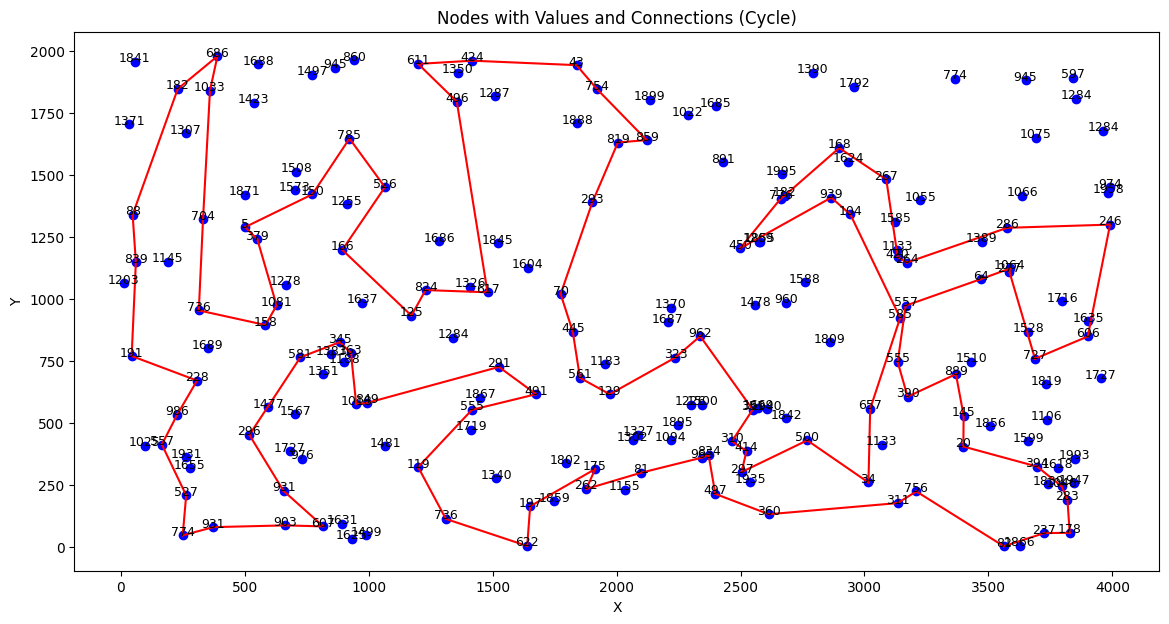

In [25]:
import matplotlib.pyplot as plt

def plot_nodes_with_lines(nodes, connections=None):
    """
    Plots nodes with optional lines connecting them.

    Parameters:
    nodes: DataFrame of nodes, each with 'x', 'y', and 'val'.
    connections: list of node positions in the nodes DataFrame, specifying the order of connections
    """
    plt.figure(figsize=(14, 7))
    plt.scatter(nodes['x'], nodes['y'], color='blue')
    for i in range(len(nodes)):
        plt.text(nodes['x'].iloc[i], nodes['y'].iloc[i] + 0.5, str(nodes['val'].iloc[i]), 
                 ha='center', fontsize=9, color='black')

    if connections:
        for start, end in zip(connections[:-1], connections[1:]):
            plt.plot([nodes['x'].iloc[start], nodes['x'].iloc[end]], 
                     [nodes['y'].iloc[start], nodes['y'].iloc[end]], color='red')
        plt.plot([nodes['x'].iloc[connections[-1]], nodes['x'].iloc[connections[0]]], 
                 [nodes['y'].iloc[connections[-1]], nodes['y'].iloc[connections[0]]], color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    text = 'Nodes with Values' if not connections else 'Nodes with Values and Connections (Cycle)'
    plt.title(text)
    plt.grid(False)
    plt.show()


plot_nodes_with_lines(df, solution_fast)